# Customer Analysis

### The analysis will follow this structure:
1. Analyze transaction and customer data to identify trends and inconsistencies. 
2. Develop metrics and examine sales drivers to gain insights into overall sales performance. 
3. Create visualizations and prepare findings to formulate a clear recommendation for the client's strategy.

## Load Data

In [2]:
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
#import dataset1

df_behavir = pd.read_csv("QVI_purchase_behaviour.csv")
df_behavir.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [4]:
#import dataset2

df_transaction = pd.read_csv("QVI_transaction_data.csv")
df_transaction.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


 ##  Exploratory data analysis

In [5]:
#### Examine transaction data
df_transaction.dtypes

DATE                int64
STORE_NBR           int64
LYLTY_CARD_NBR      int64
TXN_ID              int64
PROD_NBR            int64
PROD_NAME          object
PROD_QTY            int64
TOT_SALES         float64
dtype: object

Change date format

In [1]:
###errors in date type

from datetime import date, timedelta

new_date = []
start = date(1899, 12, 30)

for date in df_transaction['DATE']:
    delta = timedelta(date)
    new_date.append(start + delta)

df_transaction['DATE'] = pd.to_datetime(pd.Series(new_date))
df_transaction


NameError: name 'df_transaction' is not defined

In [7]:
###Examine behavior data
df_behavir.describe()


,LYLTY_CARD_NBR
count,7.263700e+04
mean,1.361859e+05
std,8.989293e+04
min,1.000000e+03
25%,6.620200e+04
50%,1.340400e+05
75%,2.033750e+05
max,2.373711e+06


In [8]:
df_behavir.dtypes

LYLTY_CARD_NBR       int64
LIFESTAGE           object
PREMIUM_CUSTOMER    object
dtype: object

In [9]:
df_transaction.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


#### We could see the ourliers in transaction dataset, which is 200 PROD_QTY

In [10]:
###check missing values
df_behavir.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [11]:
df_transaction.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [12]:
###check outliers-- 200 PROD_QTY might be the case

df_transaction[df_transaction['PROD_QTY'] == 200]


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


In [13]:

df_behavir[df_behavir['LYLTY_CARD_NBR'] == 226000]

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
59694,226000,OLDER FAMILIES,Premium


#### This customer might buy products for commerical purposes thereby removing it

In [14]:
dd = df_transaction[df_transaction.LYLTY_CARD_NBR == 226000].index

df_transaction.drop(dd, inplace=True)

#df_transaction.drop(df_transaction[df_transaction.LYLTY_CARD_NBR == 226000].index)

In [15]:
###check PROD_NAME:
df_transaction['PROD_NAME'].unique()

array(['Natural Chip        Compny SeaSalt175g',
       'CCs Nacho Cheese    175g',
       'Smiths Crinkle Cut  Chips Chicken 170g',
       'Smiths Chip Thinly  S/Cream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Old El Paso Salsa   Dip Tomato Mild 300g',
       'Smiths Crinkle Chips Salt & Vinegar 330g',
       'Grain Waves         Sweet Chilli 210g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Kettle Sensations   Siracha Lime 150g',
       'Twisties Cheese     270g', 'WW Crinkle Cut      Chicken 175g',
       'Thins Chips Light&  Tangy 175g', 'CCs Original 175g',
       'Burger Rings 220g', 'NCC Sour Cream &    Garden Chives 175g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Cheezels Cheese Box 125g', 'Smiths Crinkle      Original 330g',
       'Infzns Crn Crnchers Tangy Gcamole 110g',
       'Kettle Sea Salt     And Vinegar 175g',
       'Smiths Chip Thinly  Cut Original 175g', 'K

In [16]:
pro_words = df_transaction["PROD_NAME"].str.replace(r'([0-9]+[gG])','').str.replace(r'[^\w]',' ').str.split()
pro_words

/var/folders/qc/zvz1knc173n7lpbcfzncj0_h0000gn/T/ipykernel_54847/948948315.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  pro_words = df_transaction["PROD_NAME"].str.replace(r'([0-9]+[gG])','').str.replace(r'[^\w]',' ').str.split()


0                  [Natural, Chip, Compny, SeaSalt]
1                              [CCs, Nacho, Cheese]
2            [Smiths, Crinkle, Cut, Chips, Chicken]
3           [Smiths, Chip, Thinly, S, Cream, Onion]
4         [Kettle, Tortilla, ChpsHny, Jlpno, Chili]
                            ...                    
264831    [Kettle, Sweet, Chilli, And, Sour, Cream]
264832                 [Tostitos, Splash, Of, Lime]
264833                          [Doritos, Mexicana]
264834     [Doritos, Corn, Chip, Mexican, Jalapeno]
264835                 [Tostitos, Splash, Of, Lime]
Name: PROD_NAME, Length: 264834, dtype: object

In [17]:
word_counts = {}

def count_word(lines):
    for word in lines:
        if word not in word_counts:
            word_counts[word] = 1
        else:
            word_counts[word] += 1 
            
pro_words.apply(lambda line: count_word(line))

pd.Series(word_counts).sort_values(ascending = False)

Chips       49770
Kettle      41288
Smiths      28860
Salt        27976
Cheese      27890
            ...  
Sunbites     1432
Pc           1431
Garden       1419
NCC          1419
Fries        1418
Length: 198, dtype: int64

In [18]:
df_transaction = df_transaction[~df_transaction.PROD_NAME.str.contains("Salsa")]

In [19]:
#### Count the number of transactions by date

df_transaction['DATE'].value_counts()

2018-12-24    865
2018-12-23    853
2018-12-22    840
2018-12-19    839
2018-12-20    808
             ... 
2019-06-24    612
2018-10-18    611
2018-11-25    610
2018-09-22    609
2019-06-13    607
Name: DATE, Length: 364, dtype: int64

In [26]:
date_range = pd.date_range(start=df_transaction["DATE"].min(), 
                           end=df_transaction["DATE"].max(), freq='D')
df_date = pd.DataFrame(date_range, columns=['DATE'])
df_date_check = df_date.merge(df_transaction, how='left', on='DATE')
df_date_check[df_date_check.isnull().any(axis=1)]


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
120465,2018-12-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### We could see 2018-12-25 has no transaction

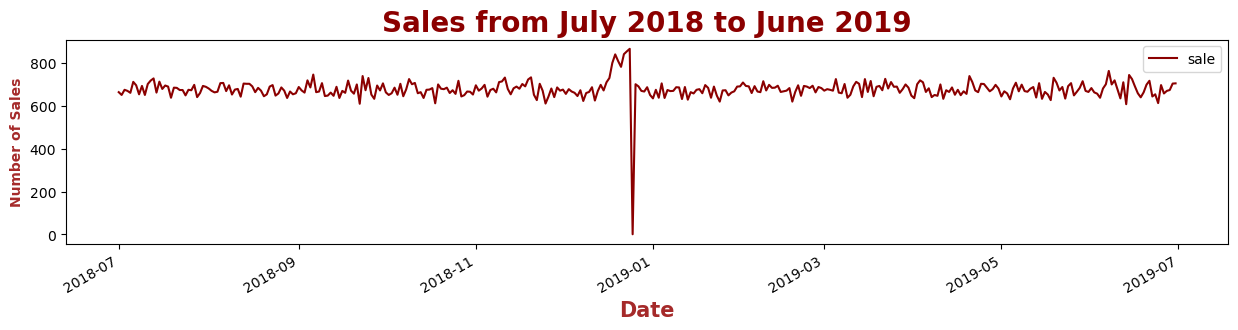

<Figure size 640x480 with 0 Axes>

In [30]:
trans_date = df_date_check['DATE'].value_counts()

df_trans_date = pd.DataFrame(trans_date)
df_trans_date_reset = df_trans_date.reset_index()
df_trans_date_reset.columns = ['date', 'sale']
ax = df_trans_date_reset.plot('date' , 'sale',figsize=(15,3), color='darkred')
plt.title("Sales from July 2018 to June 2019", fontsize=20, fontweight='bold', color='darkred')
plt.xlabel("Date", fontsize=15, fontweight='bold', color='brown')
plt.ylabel("Number of Sales", fontsize=10, fontweight='bold', color='brown')
plt.legend()
plt.show()
#transa_date.DATE =pd.to_datetime(transa_date['DATE'], format='%Y-%m-%d')

#plt.plot( df_trans_date_reset.date,df_trans_date_reset.sale)

#ax = df_trans_date_reset.plot(figsize=(15,3), color='orange')
plt. savefig("plot1") 

This is because store closed on Christmas day. Then zoom into December sales in 2018

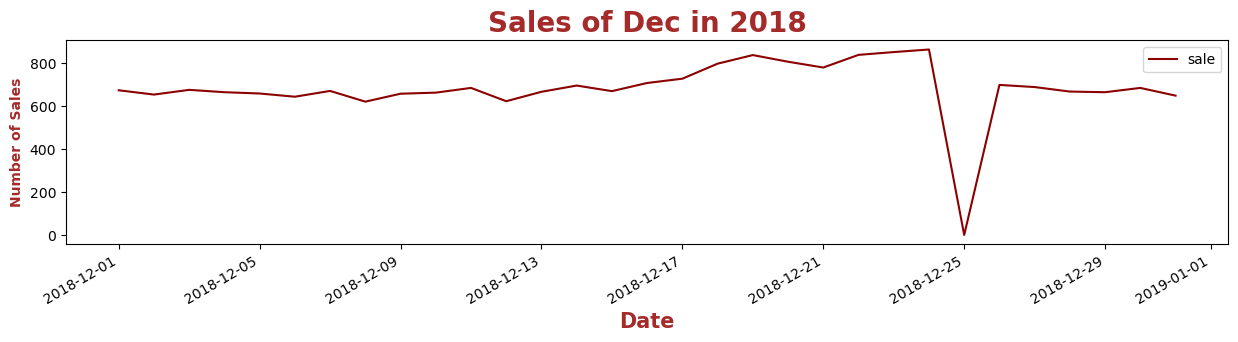

In [34]:
df_trans_dec = df_trans_date_reset[(df_trans_date_reset['date'] >= '2018-12-01') & (df_trans_date_reset['date'] <= '2018-12-31')]
ax = df_trans_dec.plot('date' , 'sale',figsize=(15,3), color='darkred')
plt.title("Sales of Dec in 2018", fontsize=20, fontweight='bold', color='brown')
plt.xlabel("Date", fontsize=15, fontweight='bold', color='brown')
plt.ylabel("Number of Sales", fontsize=10, fontweight='bold', color='brown')
plt.legend()
plt.show()



---------------------------------------------------------------------------------------------------------

In [35]:
#merge two dataset

df_all = df_transaction.merge(df_behavir, how='left', on='LYLTY_CARD_NBR')


/var/folders/qc/zvz1knc173n7lpbcfzncj0_h0000gn/T/ipykernel_54847/2040469289.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_all['PROD_NAME'] = df_all['PROD_NAME'].str.replace(r'[0-9]+(G)','g')


count    240676.000000
mean        175.302286
std          60.014468
min          70.000000
25%         150.000000
50%         170.000000
75%         175.000000
max         380.000000
Name: 0, dtype: float64
175.0    64929
150.0    38705
134.0    25102
110.0    22387
170.0    19983
165.0    15297
330.0    12540
380.0     6416
270.0     6285
200.0     4473
135.0     3257
250.0     3169
210.0     3167
90.0      3008
190.0     2995
160.0     2970
220.0     1564
70.0      1507
180.0     1468
125.0     1454
Name: 0, dtype: int64


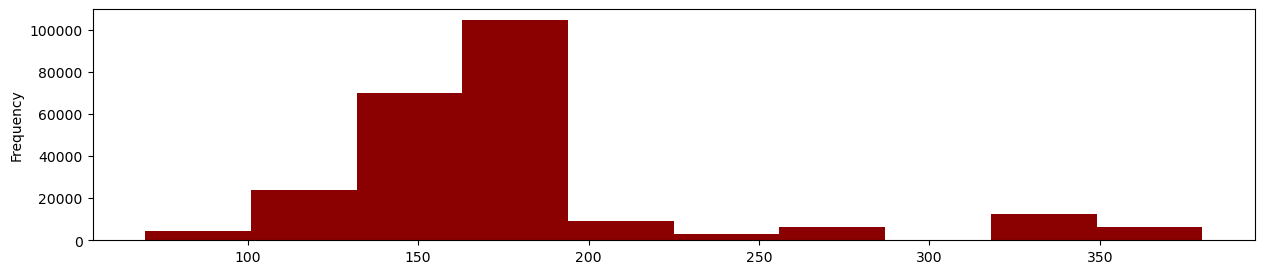

In [36]:
#analyse pack sizes
df_all['PROD_NAME'] = df_all['PROD_NAME'].str.replace(r'[0-9]+(G)','g')

pack_size =df_all['PROD_NAME'].str.extract(r'([0-9]+[gG])')[0].str.replace("g","").astype("float")

print(pack_size.describe())
print(pack_size.value_counts())

pack_size.plot.hist(figsize=(15,3), color='darkred')
plt.show()

In [37]:
df_all['PROD_NAME'].str.split(" ",expand=True)[0].value_counts().sort_index()

df_all["BRAND_NAME"] = df_all['PROD_NAME'].str.split(" ",expand=True)[0]
#df_all[df_all['BRAND_NAME']=="WW"]

In [38]:
df_all['PROD_NAME'].str.split(" ",expand=True)[0].value_counts().sort_index()
df_all['BRAND_NAME'] = df_all['PROD_NAME'].str.split(" ",expand=True)[0]
df_all['BRAND_NAME']

0          Natural
1              CCs
2           Smiths
3           Smiths
4           Kettle
            ...   
246735      Kettle
246736    Tostitos
246737     Doritos
246738     Doritos
246739    Tostitos
Name: BRAND_NAME, Length: 246740, dtype: object

PROD_NAME Column:ensure all chips 

In [39]:
#### Brands

def rename_brand(line):
    brand = line["BRAND_NAME"]
    
    if brand  == "Red":
        return "red"
    elif brand  == "Natural" or brand == "NCC":
        return "Natural Chip Co"
    elif brand == "Dorito":
        return "Doritos"
    elif brand == "Smith":
        return "Smiths"
    elif brand == "Snbts":
        return "Sunbites"
    elif brand == "WW":
        return "Woolworths"
    elif brand == "GrnWves" or brand == "Grain":
        return "Grain Waves"
    elif brand == "Infzns":
        return "Infuzions"
    else:
        return brand
    
df_all['BRAND_NAME'] = df_all.apply(lambda line: rename_brand(line), axis = 1)


<Axes: >

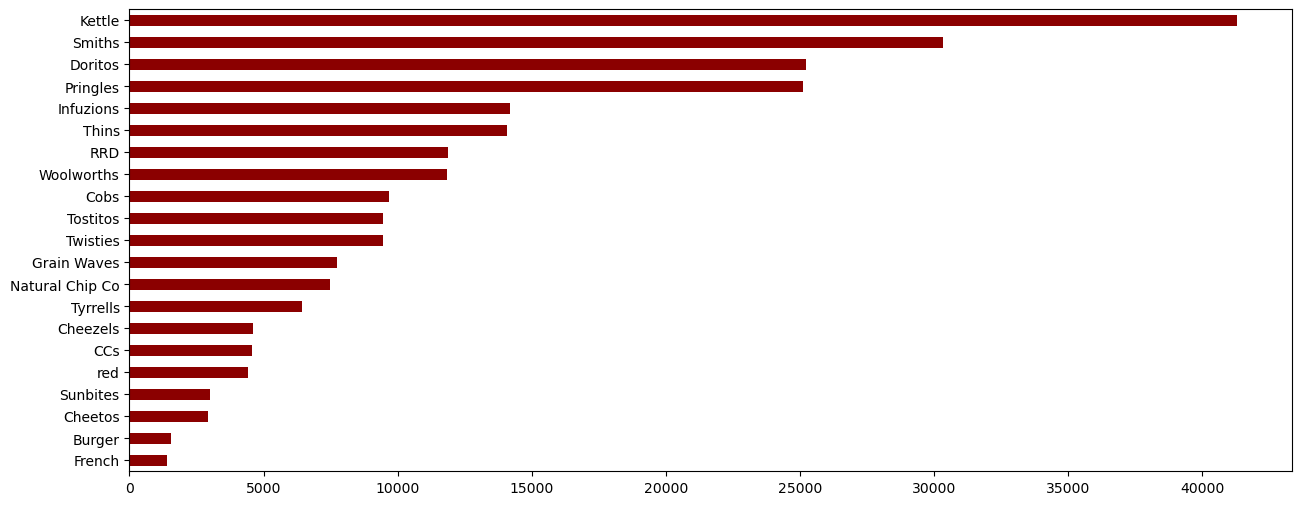

In [40]:
df_all['BRAND_NAME'].value_counts(ascending=True).plot.barh(figsize=(15,6), color='darkred')

## Data analysis on customer segments


### Who spends the most on chips?

In [41]:
#### Examining the values of lifestage and premium_customer
df_all.groupby('LIFESTAGE')['LIFESTAGE'].count()


LIFESTAGE
MIDAGE SINGLES/COUPLES    23398
NEW FAMILIES               6497
OLDER FAMILIES            45158
OLDER SINGLES/COUPLES     50793
RETIREES                  46431
YOUNG FAMILIES            40494
YOUNG SINGLES/COUPLES     33969
Name: LIFESTAGE, dtype: int64

In [42]:
df_all.groupby('PREMIUM_CUSTOMER')['PREMIUM_CUSTOMER'].count()

PREMIUM_CUSTOMER
Budget        86762
Mainstream    95043
Premium       64935
Name: PREMIUM_CUSTOMER, dtype: int64

In [43]:
#### Total sales by LIFESTAGE and PREMIUM_CUSTOMER

customer_sales = pd.DataFrame(df_all.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])["TOT_SALES"].sum()).reset_index()
customer_sales
#pd.crosstab(customer_sales['LIFESTAGE'],customer_sales['PREMIUM_CUSTOMER'])
#pivot_df = customer_sales.pivot(index = 'LIFESTAGE', columns = 'PREMIUM_CUSTOMER', values='TOT_SALES')
#pivot_customer.reset_index()
#pivot_df.reset_index(inplace=True)
#pivot_df.columns = ['LIFESTAGE'] + ['PREMIUM_CUSTOMER_' + col for col in pivot_df.columns[1:]]
#customer_sales.reset_index().dtypes
#customer_sales.sort_values(ascending = True, by = )



,LIFESTAGE,PREMIUM_CUSTOMER,TOT_SALES
0,MIDAGE SINGLES/COUPLES,Budget,33345.70
1,MIDAGE SINGLES/COUPLES,Mainstream,84734.25
2,MIDAGE SINGLES/COUPLES,Premium,54443.85
3,NEW FAMILIES,Budget,20607.45
4,NEW FAMILIES,Mainstream,15979.70
5,NEW FAMILIES,Premium,10760.80
6,OLDER FAMILIES,Budget,156863.75
7,OLDER FAMILIES,Mainstream,96413.55
8,OLDER FAMILIES,Premium,75242.60
9,OLDER SINGLES/COUPLES,Budget,127833.60


In [44]:
#pivot_df = customer_sales.pivot_table(index = 'LIFESTAGE', columns = 'PREMIUM_CUSTOMER', values='TOT_SALES')
pivot_df = pd.crosstab(index = customer_sales['LIFESTAGE'], columns = customer_sales['PREMIUM_CUSTOMER'], values=customer_sales['TOT_SALES'],aggfunc=sum,margins = True,margins_name= "Total")
pivot_df = pd.DataFrame(pivot_df)
pivot_df

PREMIUM_CUSTOMER,Budget,Mainstream,Premium,Total
LIFESTAGE,,,,
MIDAGE SINGLES/COUPLES,33345.70,84734.25,54443.85,172523.80
NEW FAMILIES,20607.45,15979.70,10760.80,47347.95
OLDER FAMILIES,156863.75,96413.55,75242.60,328519.90
OLDER SINGLES/COUPLES,127833.60,124648.50,123537.55,376019.65
RETIREES,105916.30,145168.95,91296.65,342381.90
YOUNG FAMILIES,129717.95,86338.25,78571.70,294627.90
YOUNG SINGLES/COUPLES,57122.10,147582.20,39052.30,243756.60
Total,631406.85,700865.40,472905.45,1805177.70


In [45]:
pivot_df_per = pivot_df.apply(lambda r: r/pivot_df['Total'][-1].round(2), axis=1).drop('Total', axis=1).drop('Total')
pivot_df_per

PREMIUM_CUSTOMER,Budget,Mainstream,Premium
LIFESTAGE,,,
MIDAGE SINGLES/COUPLES,0.018472,0.046940,0.030160
NEW FAMILIES,0.011416,0.008852,0.005961
OLDER FAMILIES,0.086897,0.053409,0.041682
OLDER SINGLES/COUPLES,0.070815,0.069051,0.068435
RETIREES,0.058674,0.080418,0.050575
YOUNG FAMILIES,0.071859,0.047828,0.043526
YOUNG SINGLES/COUPLES,0.031643,0.081755,0.021633


/var/folders/qc/zvz1knc173n7lpbcfzncj0_h0000gn/T/ipykernel_54847/2606990425.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + pivot_df_per.columns.tolist())
/var/folders/qc/zvz1knc173n7lpbcfzncj0_h0000gn/T/ipykernel_54847/2606990425.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + pivot_df_per.index.tolist())


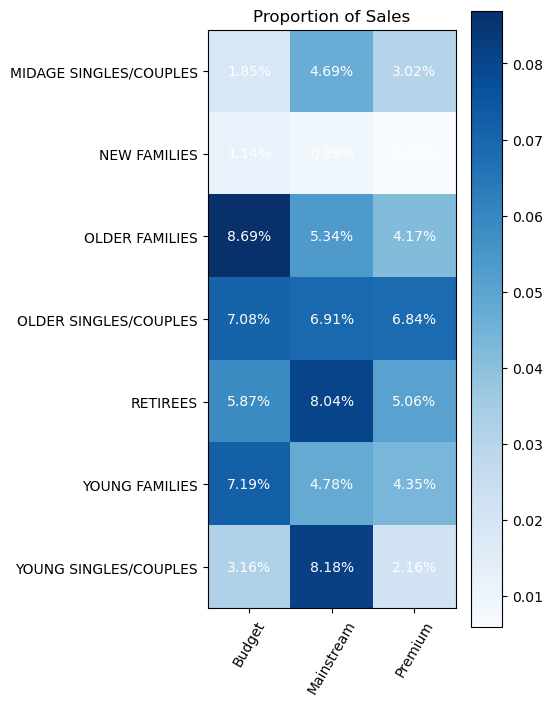

In [46]:
##plot: sales and customer categories 
##plot: use color 
import pandas as pd
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(4, 8))
cax = ax.matshow(pivot_df_per, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Set the x and y-axis labels
ax.set_xticklabels([''] + pivot_df_per.columns.tolist())
ax.set_yticklabels([''] + pivot_df_per.index.tolist())


# Rotate x-axis labels
ax.xaxis.set_ticks_position('bottom')
plt.xticks(rotation=60)

# Add a color legend
for i in range(len(pivot_df_per.index)):
    for j in range(len(pivot_df_per.columns)):
        value = pivot_df_per.iloc[i, j]
        text = ax.text(j, i, f'{value:.2%}', ha='center', va='center', color='w')
# Set plot title
plt.title("Proportion of Sales")

# Show the plot
plt.show()

#### Summary: Sales are coming mainly from Budget - older families, Mainstream - young singles/couples, and Mainstream - retirees

### How many customers are in each segment?

In [101]:
customer_num = pd.DataFrame(df_all.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).value_counts()).reset_index()
customer_num = customer_num.rename(columns = {0 : 'TOT_NUM'})

pivot_num_df = pd.crosstab(index = customer_num['LIFESTAGE'], columns = customer_num['PREMIUM_CUSTOMER'], values=customer_num['TOT_NUM'], aggfunc=sum)
#pivot_num_df = pd.DataFrame(pivot_num_df)
pivot_num_df

#pivot_num_df_per = pivot_num_df.apply(lambda r: r/pivot_num_df['Total'][-1].round(2), axis=1).drop('Total', axis=1).drop('Total')
#pivot_num_df_per

PREMIUM_CUSTOMER,Budget,Mainstream,Premium
LIFESTAGE,,,
MIDAGE SINGLES/COUPLES,4691,11095,7612
NEW FAMILIES,2824,2185,1488
OLDER FAMILIES,21514,13241,10403
OLDER SINGLES/COUPLES,17172,17061,16560
RETIREES,14225,19970,12236
YOUNG FAMILIES,17763,11947,10784
YOUNG SINGLES/COUPLES,8573,19544,5852


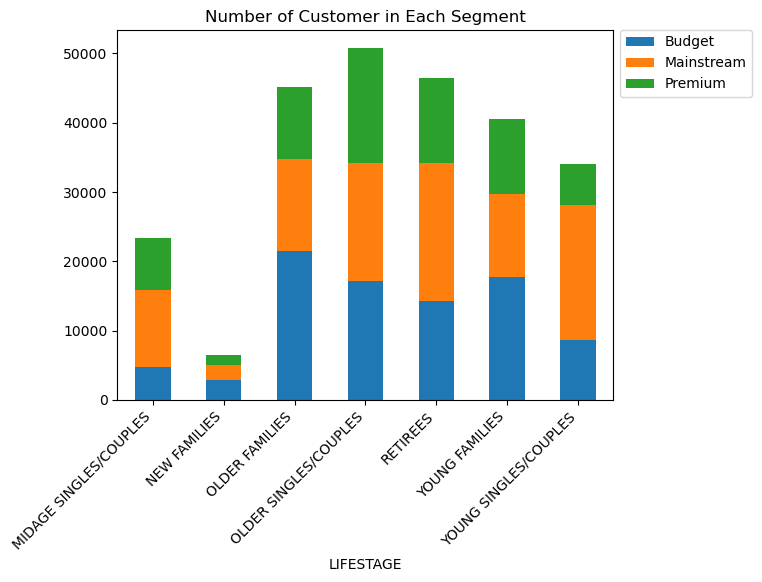

In [102]:

pl = pivot_num_df.plot(kind="bar", stacked=True, rot=0)
pl.legend( bbox_to_anchor=(1, 1.02), 
         loc='upper left')
pl.set_xticklabels(pl.get_xticklabels(), rotation=45, horizontalalignment='right')
pl.set_title('Number of Customer in Each Segment')
# for p in pl.patches:
#     width, height = p.get_width(), p.get_height()
#     x, y = p.get_xy()
#     pl.annotate(f'{height:.2%}', (x + width / 2, y + height), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

/var/folders/qc/zvz1knc173n7lpbcfzncj0_h0000gn/T/ipykernel_54847/1146526402.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + pivot_num_df_per.columns.tolist())
/var/folders/qc/zvz1knc173n7lpbcfzncj0_h0000gn/T/ipykernel_54847/1146526402.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + pivot_num_df_per.index.tolist())


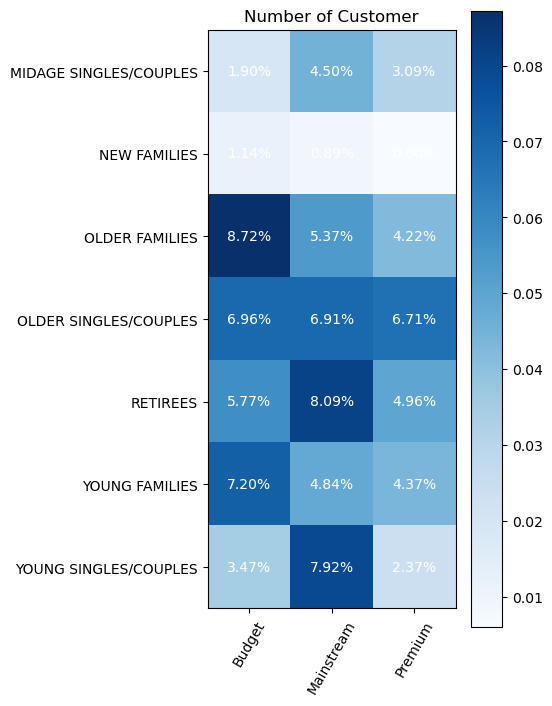

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(4, 8))
cax = ax.matshow(pivot_num_df_per, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Set the x and y-axis labels
ax.set_xticklabels([''] + pivot_num_df_per.columns.tolist())
ax.set_yticklabels([''] + pivot_num_df_per.index.tolist())


# Rotate x-axis labels
ax.xaxis.set_ticks_position('bottom')
plt.xticks(rotation=60)

# Add a color legend
for i in range(len(pivot_num_df_per.index)):
    for j in range(len(pivot_num_df_per.columns)):
        value = pivot_num_df_per.iloc[i, j]
        text = ax.text(j, i, f'{value:.2%}', ha='center', va='center', color='w')
# Set plot title
plt.title("Number of Customer")

# Show the plot
plt.show()

#### There are more Budget - older families, Mainstream - young singles/couples and Mainstream - retirees who buy chips. This contributes to there being more sales to these customer segments.


### How many chips are bought per customer by segment?


In [53]:

df_all[df_all['BRAND_NAME']=="WW"]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,BRAND_NAME


In [54]:
df_all.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,BRAND_NAME
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium,Natural Chip Co
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget,CCs
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget,Smiths
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget,Smiths
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget,Kettle


In [55]:
customer_per_unit = pd.DataFrame(df_all.groupby(['PREMIUM_CUSTOMER','LIFESTAGE']).apply( lambda x:x['PROD_QTY'].sum()/x['LYLTY_CARD_NBR'].nunique())).reset_index()
customer_per_unit = customer_per_unit .rename(columns = {0 : 'PER_UNIT'})

customer_per_unit = pd.crosstab(index = customer_per_unit['LIFESTAGE'], columns = customer_per_unit['PREMIUM_CUSTOMER'], values = customer_per_unit['PER_UNIT'], aggfunc=sum)
customer_per_unit = pd.DataFrame(customer_per_unit)
customer_per_unit


PREMIUM_CUSTOMER,Budget,Mainstream,Premium
LIFESTAGE,,,
MIDAGE SINGLES/COUPLES,6.026459,6.432080,6.078514
NEW FAMILIES,4.821527,4.891566,4.815652
OLDER FAMILIES,9.076773,9.255380,9.071717
OLDER SINGLES/COUPLES,6.781398,6.712021,6.769543
RETIREES,6.141847,5.925920,6.103358
YOUNG FAMILIES,8.722995,8.638361,8.716013
YOUNG SINGLES/COUPLES,4.250069,4.575597,4.264113


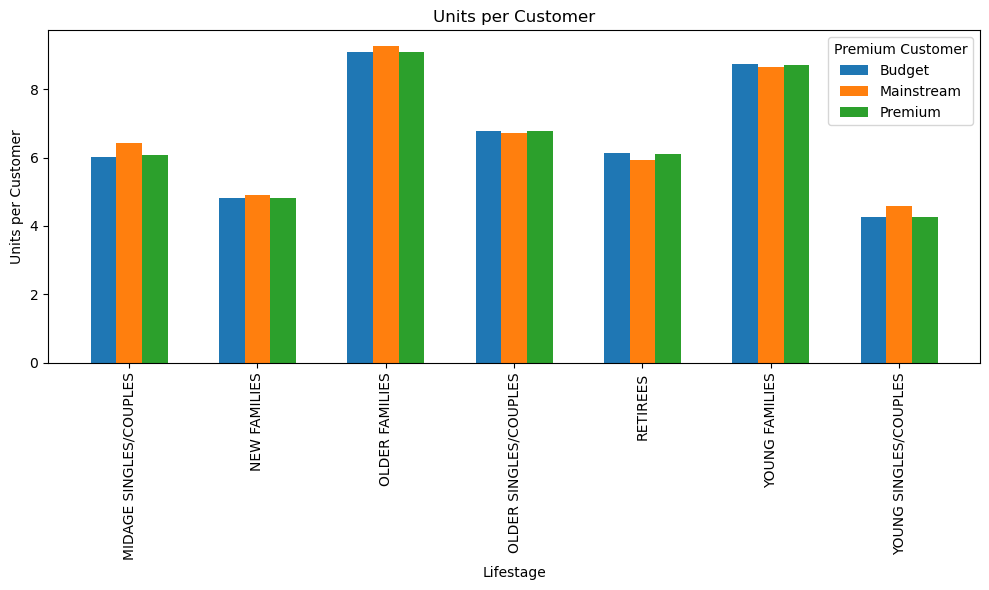

In [56]:
##doggy plot
import numpy as np
import matplotlib.pyplot as plt

lifestages = customer_per_unit.index
premium_customers = customer_per_unit.columns
unit_prices = customer_per_unit.values.T

bar_width = 0.2
x = np.arange(len(lifestages))

fig, ax = plt.subplots(figsize=(10, 6))


for i, premium_customer in enumerate(premium_customers):
    ax.bar(x + i * bar_width, unit_prices[i], bar_width, label=premium_customer)

ax.set_xlabel('Lifestage')
ax.set_ylabel('Units per Customer')
ax.set_title('Units per Customer')
ax.set_xticks(x + bar_width * (len(premium_customers) - 1) / 2)
ax.set_xticklabels(lifestages, rotation=90)
ax.legend(title='Premium Customer')

plt.tight_layout()
plt.show()

#### Older families and young families in general buy more chips per customer



### What's the average chip price by customer segment?

In [57]:
customer_per_price = pd.DataFrame(df_all.groupby(['PREMIUM_CUSTOMER','LIFESTAGE']).apply( lambda x:x['TOT_SALES'].sum()/x['PROD_QTY'].sum()).reset_index())
customer_per_price = customer_per_price.rename(columns = {0 : 'PER_PRICE'})

customer_per_price = pd.crosstab(index = customer_per_price['LIFESTAGE'], columns = customer_per_price['PREMIUM_CUSTOMER'], values = customer_per_price['PER_PRICE'], aggfunc=sum)
customer_per_price = pd.DataFrame(customer_per_price)
customer_per_price

PREMIUM_CUSTOMER,Budget,Mainstream,Premium
LIFESTAGE,,,
MIDAGE SINGLES/COUPLES,3.753878,3.994449,3.780823
NEW FAMILIES,3.931969,3.935887,3.886168
OLDER FAMILIES,3.747969,3.736380,3.717703
OLDER SINGLES/COUPLES,3.887529,3.822753,3.897698
RETIREES,3.932731,3.852986,3.924037
YOUNG FAMILIES,3.761903,3.722439,3.759232
YOUNG SINGLES/COUPLES,3.685297,4.074043,3.692889


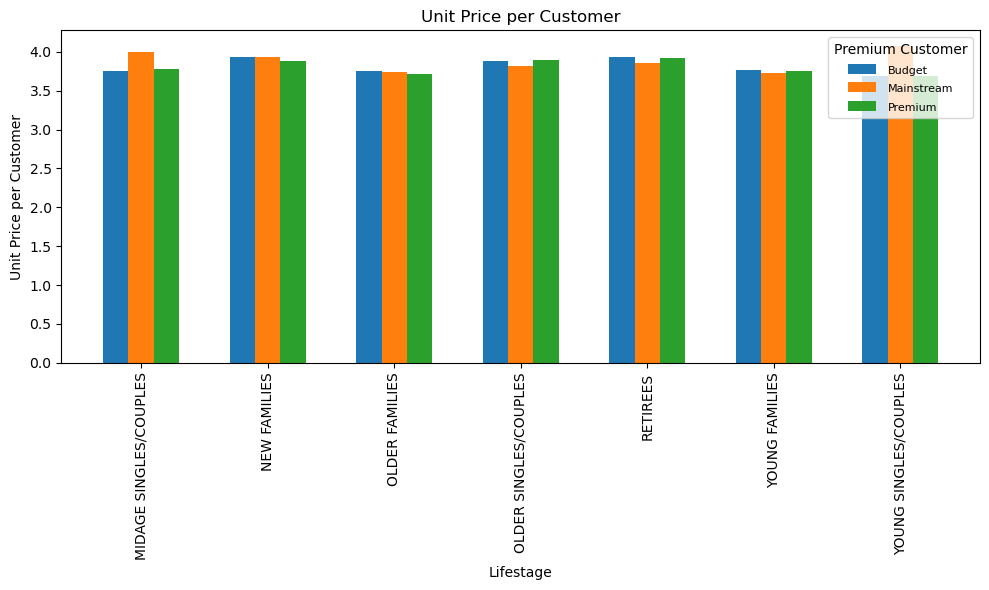

In [58]:
##doggy plot
import numpy as np
import matplotlib.pyplot as plt

lifestages = customer_per_price.index
premium_customers = customer_per_price.columns
unit_prices = customer_per_price.values.T

bar_width = 0.2
x = np.arange(len(lifestages))

fig, ax = plt.subplots(figsize=(10, 6))


for i, premium_customer in enumerate(premium_customers):
    ax.bar(x + i * bar_width, unit_prices[i], bar_width, label=premium_customer)

ax.set_xlabel('Lifestage')
ax.set_ylabel('Unit Price per Customer')
ax.set_title('Unit Price per Customer')
ax.set_xticks(x + bar_width * (len(premium_customers) - 1) / 2)
ax.set_xticklabels(lifestages, rotation=90)
legend = ax.legend(title='Premium Customer', loc='upper right')

for item in legend.get_texts():
    item.set_fontsize(8)  # Adjust the font size as needed
    
plt.tight_layout()
plt.show()

#### Mainstream midage and young singles and couples are more willing to pay more per packet of chips compared to their budget and premium counterparts. This may be due to premium shoppers being more likely to buy healthy snacks and when they buy chips, this is mainly for entertainment purposes rather than their own consumption. This is also supported by there being fewer premium midage and young singles and couples buying chips compared to their mainstream counterparts.

----------------------------------------------------------------------------------------------------

As the difference in average price per unit isn’t large, we can check if this difference is statistically different.

In [61]:
#### Perform an independent t-test between mainstream vs premium and budget midage

from scipy import stats

df_all['Unit_Price'] = df_all['TOT_SALES']/df_all['PROD_QTY']

group1 = df_all[(df_all['LIFESTAGE'].isin(["YOUNG SINGLES/COUPLES", "MIDAGE SINGLES/COUPLES"])) & (df_all['PREMIUM_CUSTOMER'] == "Mainstream")]['Unit_Price']

group2 = df_all[(df_all['LIFESTAGE'].isin(["YOUNG SINGLES/COUPLES", "MIDAGE SINGLES/COUPLES"])) & (df_all['PREMIUM_CUSTOMER'] != "Mainstream")]['Unit_Price']



t_statistic, p_value = stats.ttest_ind(group1, group2)
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference.")
# #stats.ttest_rel(df_all.loc[df_all['LIFESTAGE'].isin(["YOUNG SINGLES/COUPLES", "MIDAGE SINGLES/COUPLES"])
#                                                   & df_all['PREMIUM_CUSTOMER']== "Mainstream", 'Unit_Price'],
                                       
#                                       df_all.loc[df_all['LIFESTAGE'].isin(["YOUNG SINGLES/COUPLES", "MIDAGE SINGLES/COUPLES"])
#                                                   & df_all['PREMIUM_CUSTOMER'] != "Mainstream", 'Unit_Price'])
                                       
# print("T-Statistic:", t_statistic)
# print("P-Value:", p_value)
# Mainstream = df_all[df['LIFESTAGE'] == ]
#Other

T-Statistic: 37.83196107667815
P-Value: 2.235645611549355e-309
Reject the null hypothesis: There is a significant difference.


#### The unit price for mainstream, young and mid-age singles and couples are significantly higher than that of budget or premium, young and midage singles and couples.


## Insights -- Brand and Package Size

In [2]:
##brand 


segment1 = df_all[(df_all['LIFESTAGE']== "YOUNG SINGLES/COUPLES") & (df_all['PREMIUM_CUSTOMER']== "Mainstream")]

segment_other = df_all[~((df_all['LIFESTAGE']== "YOUNG SINGLES/COUPLES") & (df_all['PREMIUM_CUSTOMER']== "Mainstream"))]

quantity_segment1 = pd.DataFrame(segment1.groupby("BRAND_NAME")['PROD_QTY'].sum()).reset_index()

quantity_segmentOther = pd.DataFrame(segment_other.groupby("BRAND_NAME")['PROD_QTY'].sum()).reset_index()



NameError: name 'df_all' is not defined

In [71]:
##quantity_segment1_by_brand <‐ segment1[, .(targetSegment = sum(PROD_QTY)/quantity_segment1), by = BRAND]

quantity_segmeny1_by_brand = pd.DataFrame(quantity_segment1.groupby('BRAND_NAME').apply(lambda x: x['PROD_QTY'] / sum(quantity_segment1['PROD_QTY'])))

quantity_segmeny1_by_brand = quantity_segmeny1_by_brand.sort_values(by = 'PROD_QTY', ascending=False).reset_index()[['BRAND_NAME', 'PROD_QTY']].rename(columns = {"PROD_QTY" : 'Target_per'})


quantity_segmenyOth_by_brand = pd.DataFrame(quantity_segmentOther.groupby('BRAND_NAME').apply(lambda x: x['PROD_QTY'] / sum(quantity_segmentOther['PROD_QTY'])))

quantity_segmenyOth_by_brand = quantity_segmenyOth_by_brand.sort_values(by = 'PROD_QTY', ascending=False).reset_index()[['BRAND_NAME', 'PROD_QTY']].rename(columns = {"PROD_QTY" : 'Other_per'})




In [72]:
propotion_brand = quantity_segmeny1_by_brand.merge(quantity_segmenyOth_by_brand, left_on = 'BRAND_NAME', right_on = 'BRAND_NAME')
propotion_brand['Difference'] = propotion_brand['Target_per']/ propotion_brand['Other_per']

propotion_brand.sort_values(by = 'Difference', ascending=False)

,BRAND_NAME,Target_per,Other_per,Difference
11,Tyrrells,0.031553,0.025692,1.228095
6,Twisties,0.046184,0.037877,1.219319
1,Doritos,0.122761,0.101075,1.214553
0,Kettle,0.197985,0.165553,1.195897
7,Tostitos,0.045411,0.037978,1.195713
2,Pringles,0.119420,0.100635,1.186670
8,Cobs,0.044638,0.039049,1.143124
4,Infuzions,0.064679,0.057065,1.133435
5,Thins,0.060373,0.056986,1.059423
9,Grain Waves,0.032712,0.031188,1.048873


#### • Mainstream young singles/couples are 23% more likely to purchase Tyrrells chips compared to the rest of the population
#### • Mainstream young singles/couples are 56% less likely to purchase Burger Rings compared to the rest of the population

In [73]:
##size
df_all['Pack_Size'] = df_all["PROD_NAME"].str.extract('(\d+)', expand=False)


In [74]:
segmentSize1 = df_all[(df_all['LIFESTAGE']== "YOUNG SINGLES/COUPLES") & (df_all['PREMIUM_CUSTOMER']== "Mainstream")]

segment_SizeOther = df_all[~((df_all['LIFESTAGE']== "YOUNG SINGLES/COUPLES") & (df_all['PREMIUM_CUSTOMER']== "Mainstream"))]

quantity_segmentSize1 = pd.DataFrame(segmentSize1.groupby("Pack_Size")['PROD_QTY'].sum()).reset_index()

quantity_segmentSizeOther = pd.DataFrame(segment_SizeOther.groupby("Pack_Size")['PROD_QTY'].sum()).reset_index()

In [75]:

quantity_segmeny1_by_size = pd.DataFrame(quantity_segmentSize1 .groupby('Pack_Size').apply(lambda x: x['PROD_QTY'] / sum(quantity_segmentSize1 ['PROD_QTY'])))

quantity_segmeny1_by_size = quantity_segmeny1_by_size.sort_values(by = 'PROD_QTY', ascending=False).reset_index()[['Pack_Size', 'PROD_QTY']].rename(columns = {"PROD_QTY" : 'Target_per'})


quantity_segmenyOth_by_size = pd.DataFrame(quantity_segmentSizeOther.groupby('Pack_Size').apply(lambda x: x['PROD_QTY'] / sum(quantity_segmentSizeOther['PROD_QTY'])))

quantity_segmenyOth_by_size = quantity_segmenyOth_by_size.sort_values(by = 'PROD_QTY', ascending=False).reset_index()[['Pack_Size', 'PROD_QTY']].rename(columns = {"PROD_QTY" : 'Other_per'})

In [76]:
propotion_size = quantity_segmeny1_by_size.merge(quantity_segmenyOth_by_size, left_on = 'Pack_Size', right_on = 'Pack_Size')
propotion_size['Difference'] = propotion_size['Target_per']/ propotion_size['Other_per']

propotion_size.sort_values(by = 'Difference', ascending=False)

,Pack_Size,Target_per,Other_per,Difference
8,270,0.032516,0.025735,1.263465
7,380,0.032854,0.026236,1.252250
9,210,0.015792,0.012922,1.222143
5,330,0.062606,0.051440,1.217071
2,134,0.121997,0.103198,1.182158
3,110,0.108573,0.092078,1.179136
10,135,0.015087,0.013408,1.125216
11,250,0.014664,0.013106,1.118895
4,170,0.082516,0.083049,0.993577
1,150,0.156881,0.161211,0.973140


####  Mainstream young singles/couples seemingly are 27% more likely to purchase a 270g pack of chips compared to the rest of the population but let’s dive into what brands sell this pack size.

In [77]:
df_all[df_all['Pack_Size'] == '270']["BRAND_NAME"].unique()

array(['Twisties'], dtype=object)

#### Twisties are the only brand offering 270g packs and so this may instead be reflecting a higher likelihood of purchasing Twisties.

## Conclusion


Sales have primarily been driven by three customer segments: Budget - older families, Mainstream - young singles/couples, and Mainstream - retirees shoppers. The notable increase in chip spending for these segments is attributed to their larger population compared to other buyer groups.

Furthermore, Mainstream - midage and young singles/couples demonstrate a higher willingness to pay more per packet of chips, indicative of impulsive buying behavior.

A particularly noteworthy insight is that Mainstream - young singles and couples are 23% more likely to purchase Tyrrells chips than the rest of the population.

To enhance the category's performance, the Category Manager may consider strategically placing Tyrrells and smaller chip packs in discretionary spaces frequented by young singles and couples. This approach aims to boost visibility and encourage impulse buying behavior among this demographic.
